<a href="https://colab.research.google.com/github/RohanGoud/Stock_M.A/blob/master/SMA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT LIBRARIES**


In [1]:
!pip install --upgrade ta

  Created wheel for ta: filename=ta-0.5.25-cp36-none-any.whl size=24880 sha256=006791332d88d2faf41910a21ae5c9f0a00991746c0922dbcfbfe27241d20d30
  Stored in directory: /root/.cache/pip/wheels/2e/93/b7/cf649194508e53cee4145ffb949e9f26877a5a8dd12db9ed5b
Successfully built ta


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import ta as ta


## **UPLOAD DATASET TO STORAGE**


In [3]:
data = pd.read_csv('indb.us.txt') 
data.head()


,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,24.553,25.262,24.385,25.211,41230,0
1,2005-02-28,24.823,25.170,24.402,24.932,50030,0
2,2005-03-01,25.137,25.559,24.771,25.559,42835,0
3,2005-03-02,25.076,25.559,25.076,25.501,50988,0
4,2005-03-03,25.559,25.559,24.747,25.220,44543,0


In [4]:
data.shape

(3201, 7)

In [5]:
data.isnull().sum()


Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

As we can see, there are no NaN or null values in the dataset, and can therefore be considered a clean dataset.

## **DATA PREPROCESSING**


**COMPUTE IF THE STOCK IS MOVING UP/DOWN**

In [6]:
def stockTrend(s):
  if (s['Close'] - s['Open'] > 0):
    return 'up'
  elif (s['Close'] - s['Open'] == 0) :
    return 'nochange'
  else:
    return 'down'


In [7]:
data['Class'] = data.apply(stockTrend,axis=1)


In [8]:
data.tail()


,Date,Open,High,Low,Close,Volume,OpenInt,Class
3196,2017-11-06,71.65,72.20,71.20,71.45,31340,0,down
3197,2017-11-07,71.45,71.45,69.10,69.35,65954,0,down
3198,2017-11-08,68.90,69.20,67.85,68.90,60744,0,nochange
3199,2017-11-09,68.20,69.05,66.85,67.90,76509,0,down
3200,2017-11-10,68.20,68.30,67.70,68.05,51348,0,down


**COMPUTE VARIOUS OTHER TECHNICAL MARKERS THAT WILL BE USED**

**Force Index = ( Close - Open ) x volume**



In [9]:
def forceindex(s):
  return (s['Close']-s['Open'])*s['Volume']

data['forceindex'] = data.apply(forceindex, axis=1)



In [10]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Class,forceindex
0,2005-02-25,24.553,25.262,24.385,25.211,41230,0,up,27129.340
1,2005-02-28,24.823,25.170,24.402,24.932,50030,0,up,5453.270
2,2005-03-01,25.137,25.559,24.771,25.559,42835,0,up,18076.370
3,2005-03-02,25.076,25.559,25.076,25.501,50988,0,up,21669.900
4,2005-03-03,25.559,25.559,24.747,25.220,44543,0,down,-15100.077


 ------------------------------------------------------
 
 (1)***Williams %R***---->%R = -100 * ( ( Highest High - Close) / ( Highest High - Lowest Low ) )
 

(2)***Relative Strength Indicator (RSI)***---->    RSI = 100 - (100 / (1 + RS))

(3)***The Rate of Change(ROC)***---->ROC = (Current Price / Price of n periods ago)-1.0) * 100



In [11]:
data['WillR%' ] = ta.momentum.WilliamsRIndicator(data['High'], data['Low'], data['Close'],  fillna='true').wr()


data['RSI5'  ] = ta.momentum.RSIIndicator(data['Close'], n=5,   fillna='true').rsi()
data['RSI10' ] = ta.momentum.RSIIndicator(data['Close'], n=10,  fillna='true').rsi()
data['RSI15' ] = ta.momentum.RSIIndicator(data['Close'], n=15,  fillna='true').rsi()

data['ROC5'  ] = ta.momentum.ROCIndicator(data['Close'], n=5,   fillna='true').roc()
data['ROC10' ] = ta.momentum.ROCIndicator(data['Close'], n=10,  fillna='true').roc()

data['ATR5'  ] = ta.volatility.AverageTrueRange(data['High'], data['Low'], data['Close'], n=5,  fillna='true').average_true_range()
data['ATR10' ] = ta.volatility.AverageTrueRange(data['High'], data['Low'], data['Close'], n=10, fillna='true').average_true_range()

data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Class,forceindex,WillR%,RSI5,RSI10,RSI15,ROC5,ROC10,ATR5,ATR10
3196,2017-11-06,71.65,72.20,71.20,71.45,31340,0,down,-6268.0,-79.411765,37.530440,41.744495,44.995751,-0.418118,0.070028,1.275869,1.394496
3197,2017-11-07,71.45,71.45,69.10,69.35,65954,0,down,-138503.4,-96.093750,18.660711,30.149666,36.453226,-3.814147,-3.006993,1.490695,1.490046
3198,2017-11-08,68.90,69.20,67.85,68.90,60744,0,nochange,0.0,-86.274510,16.445872,28.279470,34.930654,-4.172462,-2.889359,1.492556,1.491042
3199,2017-11-09,68.20,69.05,66.85,67.90,76509,0,down,-22952.7,-82.786885,12.368160,24.523426,31.771106,-6.280193,-5.233775,1.634045,1.561938
3200,2017-11-10,68.20,68.30,67.70,68.05,51348,0,down,-7702.2,-80.327869,16.261190,26.158026,32.748733,-4.958101,-5.943331,1.427236,1.465744


In [12]:
type(data['High'])
type(ta.momentum.WilliamsRIndicator(data['High'], data['Low'], data['Close'], 5).wr())

pandas.core.series.Series

In [13]:
data.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Class,forceindex,WillR%,RSI5,RSI10,RSI15,ROC5,ROC10,ATR5,ATR10
0,2005-02-25,24.553,25.262,24.385,25.211,41230,0,up,27129.340,-5.815279,100.000000,100.000000,100.000000,0.0,0.0,0.0000,0.0
1,2005-02-28,24.823,25.170,24.402,24.932,50030,0,up,5453.270,-37.628278,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0
2,2005-03-01,25.137,25.559,24.771,25.559,42835,0,up,18076.370,-0.000000,73.747354,71.404168,70.655849,0.0,0.0,0.0000,0.0
3,2005-03-02,25.076,25.559,25.076,25.501,50988,0,up,21669.900,-4.940375,67.952747,66.522062,66.031775,0.0,0.0,0.0000,0.0
4,2005-03-03,25.559,25.559,24.747,25.220,44543,0,down,-15100.077,-28.875639,46.043271,48.625080,49.287827,0.0,0.0,0.7538,0.0


In [14]:
A=data['Date']
B=data['Class']

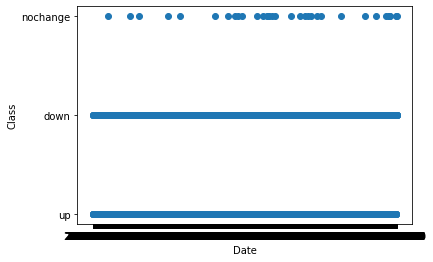

In [15]:
import matplotlib.pyplot as plt
plt.scatter(A,B)
plt.ylabel('Class')
plt.xlabel('Date')
plt.show()

In [16]:
import seaborn as sn
df = pd.DataFrame(data,columns=['forceindex','WillR%','RSI5','RSI10','RSI15','ROC5','ROC10','ATR5','ATR10'])
corrMatrix = df.corr()
print("Co-Relation Matrix")
print (corrMatrix)
corrMatrix = df.corr()

#sn.heatmap(corrMatrix, annot=True)
#plt.show()

Co-Relation Matrix
            forceindex    WillR%      RSI5  ...     ROC10      ATR5     ATR10
forceindex    1.000000  0.264453  0.279642  ...  0.187579  0.006866  0.012030
WillR%        0.264453  1.000000  0.906235  ...  0.735846 -0.044506 -0.036306
RSI5          0.279642  0.906235  1.000000  ...  0.714336 -0.044295 -0.041009
RSI10         0.219914  0.882447  0.934674  ...  0.755403 -0.048712 -0.047385
RSI15         0.188165  0.814387  0.854028  ...  0.716341 -0.045105 -0.046577
ROC5          0.239605  0.682895  0.748406  ...  0.651489  0.005677 -0.003343
ROC10         0.187579  0.735846  0.714336  ...  1.000000 -0.013045 -0.016408
ATR5          0.006866 -0.044506 -0.044295  ... -0.013045  1.000000  0.975206
ATR10         0.012030 -0.036306 -0.041009  ... -0.016408  0.975206  1.000000

[9 rows x 9 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**SPLIT DATASET INTO TRAIN AND TEST SETS**

In [17]:
x_data = data[['WillR%', 'RSI5', 'RSI10', 'RSI15', 'ROC5', 'ROC10', 'ATR5', 'ATR10']]
y_data = data['Class']

x_data.tail()

,WillR%,RSI5,RSI10,RSI15,ROC5,ROC10,ATR5,ATR10
3196,-79.411765,37.530440,41.744495,44.995751,-0.418118,0.070028,1.275869,1.394496
3197,-96.093750,18.660711,30.149666,36.453226,-3.814147,-3.006993,1.490695,1.490046
3198,-86.274510,16.445872,28.279470,34.930654,-4.172462,-2.889359,1.492556,1.491042
3199,-82.786885,12.368160,24.523426,31.771106,-6.280193,-5.233775,1.634045,1.561938
3200,-80.327869,16.261190,26.158026,32.748733,-4.958101,-5.943331,1.427236,1.465744


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

# **ASSEMBLING MODELS**

**KNN MODEL**

First, we will create a new k-NN classifier. Next, we need to create a dictionary to store all the values we will test for ‘n_neighbors’, which is the hyperparameter we need to tune. We will test 24 different values for ‘n_neighbors’. Then we will create our grid search, inputing our k-NN classifier, our set of hyperparamters and our cross validation value.

In [19]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#create a new knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)

#fit model to training data
knn_gs.fit(X_train, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

In our case, we are using 5-fold cross validation. The dataset is split into 5 groups, and the model is trained and tested 5 separate times so each group would get a chance to be the test set. This is how we will score our model running with each hyperparamter value to see which value for ‘n_neighbors’ gives us the best score.



In [20]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 19}


Now we will save our best k-NN model to ‘knn_best’ using the ‘best_estimator_’ function and check what the best value was for ‘n_neighbors’.

**RANDOM FOREST**

The next model we will build is a random forest. A random forest is considered an ensemble model in itself, since it is a collection of decision trees combined to make a more accurate model.

In [21]:
from sklearn.ensemble import RandomForestClassifier

#create a new random forest classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

We will create a new random forest classifier and set the hyperparameters we want to tune. ‘n_estimators’ is the number of trees in our random forest. Then we can run our grid search to find the optimal number of trees.

Just like before, we will save our best model and print the best ‘n_estimators’ value.

In [22]:
#save best model
rf_best = rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 200}


**GAUSSIAN KERNEL (SVM)**

In [23]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **EVALUATION OF INDIVIDUAL TRAINING ACCURACIES**

In [24]:

print('knn: {}'.format(knn_best.score(X_train, y_train)))
print('rf: {}'.format(rf_best.score(X_train, y_train)))
print('svclassifier: {}'.format(svclassifier.score(X_train, y_train)))

knn: 0.7328125
rf: 1.0
svclassifier: 0.718359375


As we can say this is an overfitted model.

## **EVALUATION OF INDIVIDUAL MODEL SCORES**




Now let’s check the accuracy scores of all three of our models on our test data.

In [25]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('svclassifier: {}'.format(svclassifier.score(X_test, y_test)))

knn: 0.7207488299531981
rf: 0.7160686427457098
svclassifier: 0.7160686427457098


As you can see from the output, Knn is the most accurate out of the three. 

# VOTING CLASSIFIER

Now that we’ve built our three individual models, it’s time we built our voting classifier.

In [26]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('svclassifier', svclassifier)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [27]:
#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

0.733229329173167

In [28]:
#fit model to training data
#ensemble.fit(X_train, y_train)

#test our model on the train data
#ensemble.score(X_train, y_train)

In [31]:
x=['KNN','RF','SVM','ENSEMBLE']
y=[72.07,71.60,71.608,73.30]

<function matplotlib.pyplot.show>

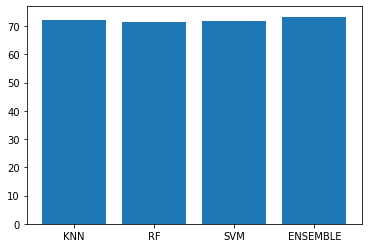

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(x,y)
plt.show

**Our ensemble model performed better than our individual k-NN, random forest and Gaussian SVM models!**

